In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-costs/insurance.csv


In [5]:
df=pd.read_csv('/kaggle/input/medical-insurance-costs/insurance.csv')

In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.shape

(1338, 7)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Observation

### 1) This is how bmi is categorized: ###

### Underweight: Less than 18.5 <br>
### Healthy weight: Between 18.5 and 24.9 <br>
### Overweight: Between 25 and 29.9 <br>
### Obese: Between 30 and 39.9 <br>

### From the above data max bmi is 53 and average is 30 most of the people belong to overweight and obese.

### 2) Most of the people have 1 child.

### 3) Medical insurance is taken by people who are above 35.

### 4) Avg money is 13270. 

In [12]:
df_male=df[df["sex"]=='male']
df_male.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


<Axes: xlabel='age'>

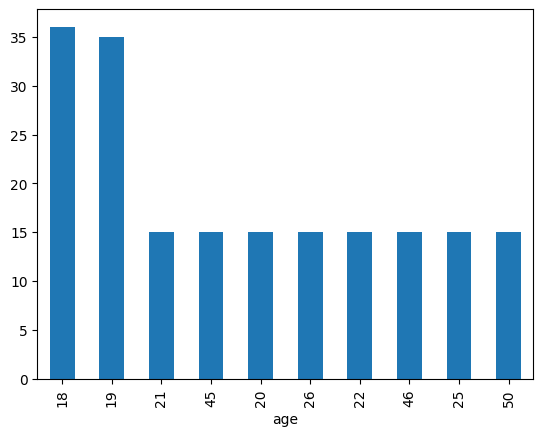

In [13]:
import matplotlib.pyplot as plt
df_male["age"].value_counts().head(10).plot(kind='bar')

# Univariate analysis of male

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df_male.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 1 to 1333
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       676 non-null    int64  
 1   sex       676 non-null    object 
 2   bmi       676 non-null    float64
 3   children  676 non-null    int64  
 4   smoker    676 non-null    object 
 5   region    676 non-null    object 
 6   charges   676 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 42.2+ KB


# UNIVARIATE ANALYSIS

## Age, bmi, children,charges-> Numerical column ##
## Sex, Smoker,Region->Categorical columns ##


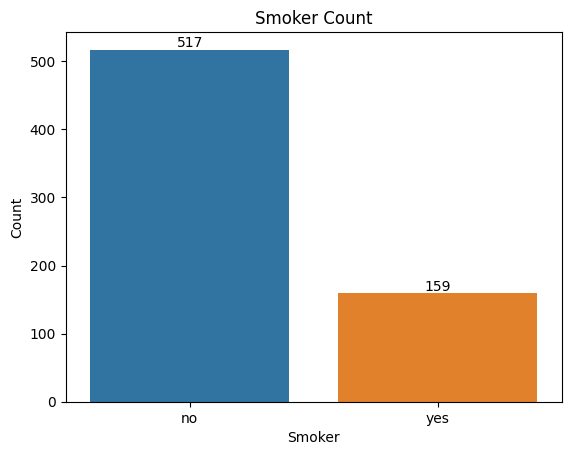

In [23]:

ax=sns.countplot(data=df_male.reset_index(), x='smoker')

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker Count')
plt.show()


# Obs1: Out of 676 male 159 are smokers.

# BIVARIATE ANALYSIS

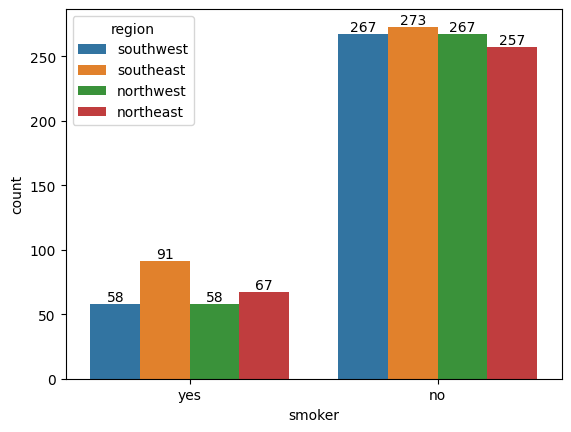

In [26]:
ax=sns.countplot(data=df.reset_index(),x='smoker',hue='region')

for i in ax.containers:
    ax.bar_label(i)

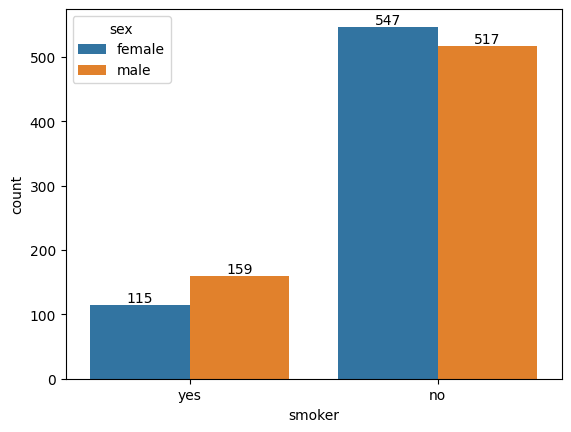

In [45]:
ax=sns.countplot(data=df.reset_index(),x='smoker',hue='sex')

for i in ax.containers:
    ax.bar_label(i)

# Obs3: 115 female and 159 males are smokers.

<Axes: ylabel='count'>

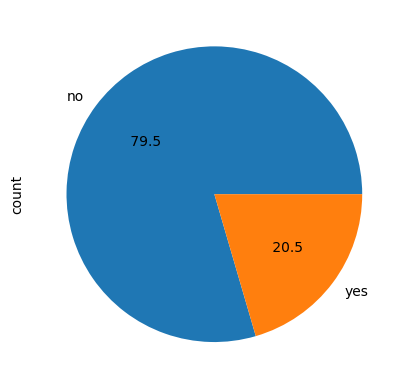

In [47]:
df['smoker'].value_counts().plot(kind='pie',autopct='% .1f')

# Obs4: 20.5 of the population do smoking

In [52]:
def rename_bmi(bmi):
    if bmi <= 18.5:
        return 'Underweight'
    elif 18.5 < bmi <= 24.9:
        return 'Healthy'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

In [53]:
df['bmi_cat']=df['bmi'].apply(rename_bmi)

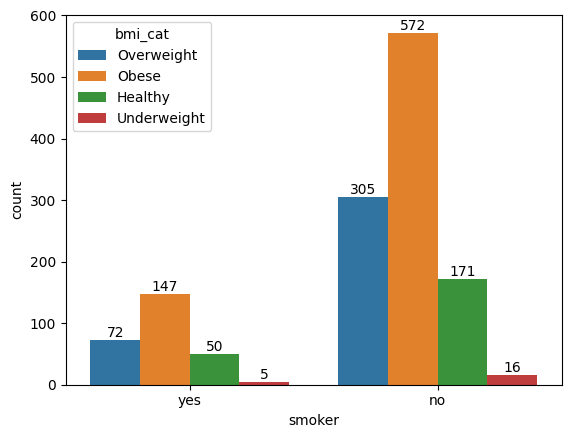

In [56]:
ax=sns.countplot(data=df.reset_index(),x='smoker',hue='bmi_cat')

for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='age', ylabel='charges'>

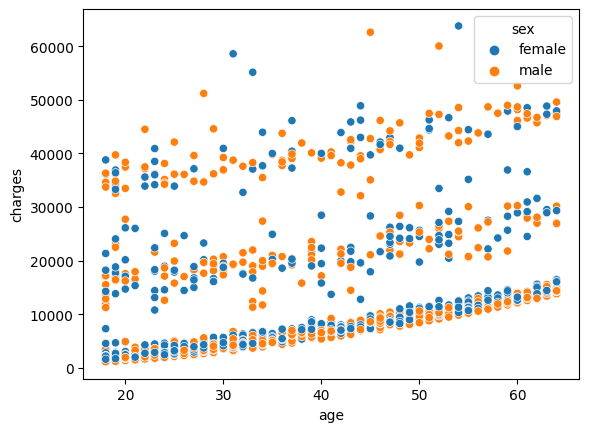

In [30]:
sns.scatterplot(x='age', y='charges', hue='sex',data=df)

<Axes: xlabel='bmi', ylabel='charges'>

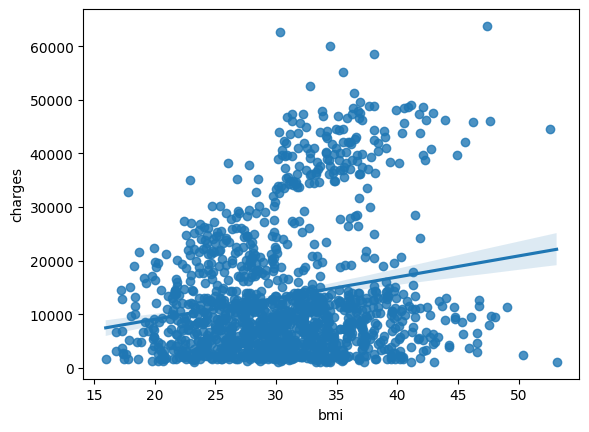

In [33]:
sns.regplot(x=df['bmi'],y=df['charges'])

# Obs5: This plot show a positive correlation between bmi and charges which mean people with higher bmi as they are at higher risk they spend more on medical insurance.

<Axes: xlabel='bmi', ylabel='charges'>

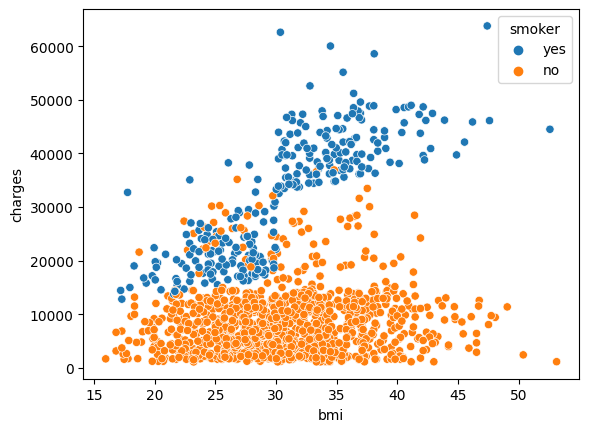

In [39]:
sns.scatterplot(x=df['bmi'],y=df['charges'],hue=df['smoker'])

# Obs6: People who smoke have higher charges 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


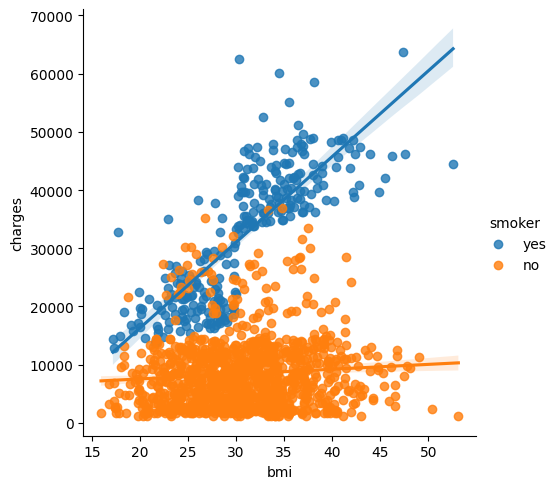

In [41]:
sns.lmplot(x='bmi',y='charges',hue='smoker',data=df)

<Axes: xlabel='bmi', ylabel='Density'>

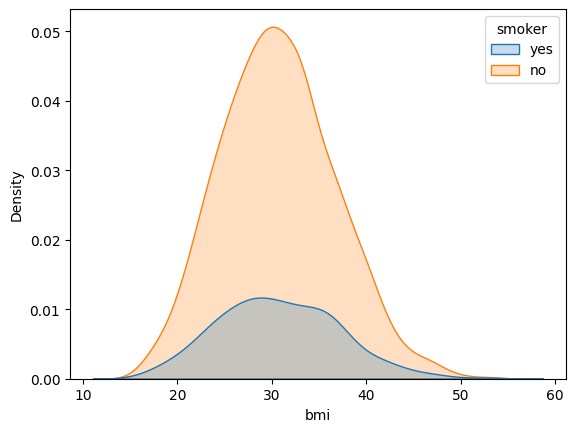

In [43]:
sns.kdeplot(data=df,x="bmi",hue='smoker',fill=True)